# Problem 2

In [1]:
include("qm.jl")
include("transversefieldising.jl")

# import Pkg; Pkg.add("PyPlot")

using .QuantumMechanics
using .TransverseFieldIsing
using Test

## (2.a) Generating the Hamiltonian

In [2]:
# @testset "2.a) Hamiltonian Tests" begin
    @testset "2 Sites, h = 1" begin
        x = H(2, 1)
    
        correct_zpart = -[
            2  0  0 0;
            0 -2  0 0;
            0  0 -2 0;
            0  0  0 2
        ]
        correct_xpart = -[
            0 1 1 0;
            1 0 0 1;
            1 0 0 1;
            0 1 1 0
        ]
    
        @test x.L == 2
        @test x.matrix == (correct_zpart + correct_xpart)
    end
    
    @testset "1 Site, h = 1" begin
        x = H(1,1)

        @test x.L == 1
        @test x.matrix == -[1 1; 1 1]
    end
# end

Test Summary:  | Pass  Total
2 Sites, h = 1 |    2      2
Test Summary: | Pass  Total
1 Site, h = 1 |    2      2


Test.DefaultTestSet("1 Site, h = 1", Any[], 2, false)

## (2.b) Calculate the GS energy (density) and average magnetisation

We take $L = 2$ and $h = 1$

In [3]:
ground_state_energy(2,1)

-2.8284271247461894

In [4]:
ground_state_energy_density(2,1)

-1.4142135623730947

In [5]:
average_ground_state_magnetization(2,1)

-1.3877787807814457e-16

In [6]:
ground_state(2,1).state

4-element Array{Complex{Float64},1}:
  0.6532814824381882 + 0.0im
 0.27059805007309845 + 0.0im
  0.2705980500730985 + 0.0im
  0.6532814824381884 + 0.0im

## (2.c) Repeat for different $L$ and $h$

In [7]:
# import Pkg; Pkg.add("Plots")

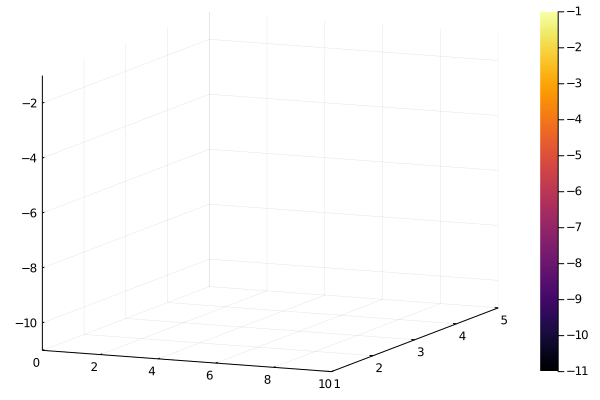

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.


In [10]:
using Plots

_h_array = collect(range(0, 10, length=100))
_L_array = collect(range(1, 5, step=1))

# for h_idx in eachindex(_h_array)
#     println(ground_state_energy_density(L, _h_array[h_idx]))
# end

function get_gsed(L :: Integer) :: Array
    return map(x -> ground_state_energy_density(L, x), _h_array)
end
function get_gsam(L :: Integer) :: Array
    return map(x -> average_ground_state_magnetization(L, x), _h_array)
end

_gsed = map(get_gsed, _L_array)
_gsam = map(get_gsam, _L_array)
# display(_gsed)
# display(_gsam)

z = Surface((x,y)->rosenbrock([x,y]), _h_array, _L_array)

surface(_h_array, _L_array, _gsed)